## [실전] 타이타닉 생존율 예측 모형을 위한 데이터 전처리
- 케글에서 제공하는 타이타닉 전처리를 적용해 다양한 머신러닝 방법론에 적용

- 엑셀 파일 읽어오기
- boat, body, home.dest 열 삭제한 데이터 프레임을 만든 후 학습용과 테스트용 데이터 나누기
- 학습용 데이터 확인

In [34]:
import pandas as pd
titanic_url = 'https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic = pd.read_excel(titanic_url, sheet_name = 'total')
train_1000 = titanic.iloc[:1000]
test_309 = titanic.iloc[1000:]
train_1000.drop(['boat', 'body', 'home.dest'], axis = 1, inplace = True)
test_309.drop(['boat', 'body', 'home.dest'], axis = 1, inplace = True)
train_df = train_1000
test_df = test_309
train_df

## inplace는 비추한다고 하셨는데, 그럼 어떻게 수정할 수 있는지?

C:\Users\user\AppData\Local\Temp\ipykernel_4956\3779158800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1000.drop(['boat', 'body', 'home.dest'], axis = 1, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\3779158800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_309.drop(['boat', 'body', 'home.dest'], axis = 1, inplace = True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",male,35.0000,0,0,349213,7.8958,NaN,C
996,3,0,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
997,3,1,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
998,3,0,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C


info 함수로 학습용 데이터 형태 파악

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1000 non-null   int64  
 1   survived  1000 non-null   int64  
 2   name      1000 non-null   object 
 3   sex       1000 non-null   object 
 4   age       861 non-null    float64
 5   sibsp     1000 non-null   int64  
 6   parch     1000 non-null   int64  
 7   ticket    1000 non-null   object 
 8   fare      1000 non-null   float64
 9   cabin     283 non-null    object 
 10  embarked  998 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


각 열에 대한 전처리
- 누락된 값이 있는데 데이터 분석을 위해 모두 숫자형으로 변경
- 범위가 매우 넓어서 대략 비슷하게 조절할 필요도 있음
- 결측치가 많은 cabin은 전체 열을 생략할 수도 있음

### name열
- 가장 먼저 확인해야함
- 이름으로 사람의 생존 여부 판단은 못하지만 성별을 나타내는 Mr, Miss, Mrs와 같은 중요한 정보가 담겨 있음.
- 하급용 데이터와 테스트용 데이터의 이름에서 이 정보만 추출

In [36]:
total = [train_df, test_df]

for dataset in total:
    dataset['title']= dataset['name'].str.extract('([A-Za-z]+)\.', expand = False)

train_df['title'].unique()

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\user\AppData\Local\Temp\ipykernel_4956\2591766311.py:4: SyntaxWarning: invalid escape sequence '\.'
  dataset['title']= dataset['name'].str.extract('([A-Za-z]+)\.', expand = False)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\2591766311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']= dataset['name'].str.extract('([A-Za-z]+)\.', expand = False)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\2591766311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

각 호칭에 따라 5개 그룹으로 매핑
- 1: 남자
- 2: 아가씨
- 3: 부인
- 4: Master
- 5: 고위직

In [37]:
title_mapping={"Mr":1, "Miss":2, 'Ms':2, 'Mlle':2, "Mrs":3, 'Mme':3, 'Master':4, 'Dr':5, 'Rev':5, 'Col': 5, 'Major':5, 'Lady':5, 'Capt':5, 'Sir':5, 'Don':5,
'Jonkheer':5, 'Countess':5}

for dataset in total:
    dataset['title']=dataset['title'].map(title_mapping)
    #map : 일괄적으로 바꾸거나 변환. 한 열의 값을 다른 값으로 매핑(판다스 사용)

train_df['title'].unique()
#unique : 중복 값 제거(판다스/넘파이 사용)

C:\Users\user\AppData\Local\Temp\ipykernel_4956\1254239255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['title'].map(title_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\1254239255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['title'].map(title_mapping)


array([ 2.,  4.,  1.,  3.,  5., nan])

응용하여 name 열은 지우고 title 열을 사용하여 5개 그룹으로 만들기

In [38]:
total = [train_df, test_df]
titles = {'Mr':1, "Miss":2, 'Ms':3, 'Master':4, 'Special':5}

for dataset in total:
    dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.', expand = False)
    #dataset.name: name 컬럼 선택
    #.str.extract(...): 문자열에서 정규표현식을 이용해 패턴에 맞는 부분만 추출
    #'([A-Za-z]+)\.': 정규표현식 (regex):
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].map(titles)
    dataset['title'] = dataset['title'].fillna(0)
    #판다스에서 결측값(NaN)을 0으로 채워주는 함수. 비어있는 셀에 기본값 0을 넣어줌

train_df = train_df.drop(['name'], axis = 1)
test_df = test_df.drop(['name'], axis = 1)
test_df

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\user\AppData\Local\Temp\ipykernel_4956\982112466.py:5: SyntaxWarning: invalid escape sequence '\.'
  dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.', expand = False)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\982112466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.', expand = False)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\982112466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
1000,3,1,male,NaN,0,0,367228,7.7500,NaN,Q,1.0
1001,3,1,female,NaN,2,0,367226,23.2500,NaN,Q,2.0
1002,3,1,female,NaN,2,0,367226,23.2500,NaN,Q,2.0
1003,3,1,male,NaN,2,0,367226,23.2500,NaN,Q,1.0
1004,3,1,female,NaN,0,0,330932,7.7875,NaN,Q,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,2665,14.4542,NaN,C,2.0
1305,3,0,female,NaN,1,0,2665,14.4542,NaN,C,2.0
1306,3,0,male,26.5,0,0,2656,7.2250,NaN,C,1.0
1307,3,0,male,27.0,0,0,2670,7.2250,NaN,C,1.0


### age열
- 중간중간 값이 누락되어 있음
- 가장 기본적인 결측치 값 채우는 방법은 나머지 모든 사람의 평균 나이를 구해서 채우는 것
- title 열의 그룹별로 평균 나이를 채우기
- 결측치에 각 계급의 중앙값 채우기

In [50]:
#inplace 삭제 및 변수 생성
train_df['age'] = train_df['age'].fillna(train_df.groupby('title')['age'].transform('median'))
test_df['age'] = test_df['age'].fillna(train_df.groupby('title')['age'].transform('median'))
train_df['age']
test_df['age']

1000    30.0
1001    22.0
1002    22.0
1003    30.0
1004    22.0
        ... 
1304    14.5
1305    22.0
1306    26.5
1307    27.0
1308    29.0
Name: age, Length: 309, dtype: float64

age 열의 전처리 결과 시각화
- matplotlib, seaborn 사용

TypeError: set() takes no keyword arguments

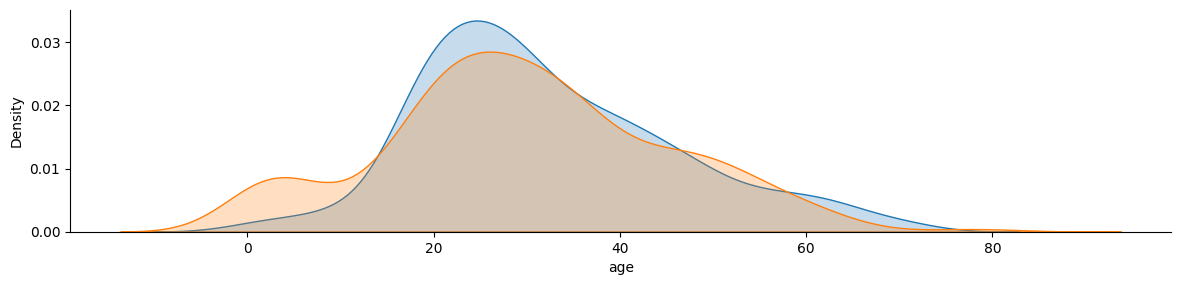

In [55]:
import matplotlib.pyplot as plt
#matploltlib.pyplot: 파이썬에서 그래프를 그릴 때 기본적으로 쓰는 라이브러리
import seaborn as sns
#seaborn: matplotlib 기반의 더 예쁘고 간편한 시각화 라이브러리

facet = sns.FacetGrid(train_1000, hue = "survived", aspect=4)
# train_1000 데이터프레임을 기반으로 facetgrid 라는 시각화틀 생성
# hue="survived": 생존 여부(0 = 사망, 1--= 생존)에 따라 색깔을 다르게 보여줌
# aspect= 4: 가로/세로 비율 4로 설정해서 가로로 길쭉한 그래프 생성

facet.map(sns.kdeplot, 'age', fill=True)
# age 컬럼 기준으로 밀도 곡선(kde plot) 그림
# fill = True: 그래프 아래를 색으로 채워줌
#fill은 shade의 최신 대체

facet = set(xlim =(0, train_1000['age'].max()))
# x축을 0부터 데이터의 최대 나이까지로 제한해서 그래프가 예쁘게 보이게 함

facet.add_legend()
# 생존 여부(0,1)에 따른 색상 구분을 보여주는 범례(legend)를 추가

sns.axes_style("darkgrid")
#그래프 배경 스타일을 darkgrid로 설정. 
# 격자무늬가 있는 어두운 스타일로 데이터 시각화에 유용

plt.show()

age 열을 나이대별로 구분

In [81]:
data = [train_df, test_df]
# 두 개의 데이터프레임을 리스트에 담아 반복문으로 처리하려는 준비 작업
for dataset1 in data:
    dataset1['age'] = dataset1['age'].astype(int)
    # 나이 데이터를 정수로 변환
    dataset1.loc[dataset1['age'] <= 11, 'age'] = 0
    dataset1.loc[(dataset1['age'] > 11) & (dataset1['age'] <= 18), 'age'] = 1
    dataset1.loc[(dataset1['age'] > 18) & (dataset1['age'] <= 22), 'age'] = 2
    dataset1.loc[(dataset1['age'] > 22) & (dataset1['age'] <= 27), 'age'] = 3
    dataset1.loc[(dataset1['age'] > 27) & (dataset1['age'] <= 33), 'age'] = 4
    dataset1.loc[(dataset1['age'] > 33) & (dataset1['age'] <= 40), 'age'] = 5
    dataset1.loc[(dataset1['age'] > 40) & (dataset1['age'] <= 66), 'age'] = 6
    dataset1.loc[dataset1['age'] > 66, 'age'] = 6

train_df['age'].value_counts()
# train_df['age']에 있는 각각의 범주(0~6)가 몇 개 있는지 출력

age
0    1000
Name: count, dtype: int64

### sex열
성별을 나타내는 열로 male은 0, female은 1로 변환시키고 문자를 숫자로 변환시킴

In [82]:
sex_mapping ={'male' : 0 , 'female' : 1}
for dataset in data:
    dataset['sex'] = dataset['sex'].map(sex_mapping)

train_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,1,0,0,0,24160,211.3375,B5,S,2.0
1,1,1,0,0,1,2,113781,151.5500,C22 C26,S,4.0
2,1,0,1,0,1,2,113781,151.5500,C22 C26,S,2.0
3,1,0,0,0,1,2,113781,151.5500,C22 C26,S,1.0
4,1,0,1,0,1,2,113781,151.5500,C22 C26,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,0,0,0,349213,7.8958,NaN,C,1.0
996,3,0,0,0,0,0,349257,7.8958,NaN,S,1.0
997,3,1,1,0,0,0,2649,7.2250,NaN,C,0.0
998,3,0,0,0,0,0,349255,7.8958,NaN,C,1.0


### embarked, plcass 열
승선 도시별로 부유한 사람과 가난한 사람의 생존율 차이 확인을 위해 승객 등급 비율 확인

<Axes: >

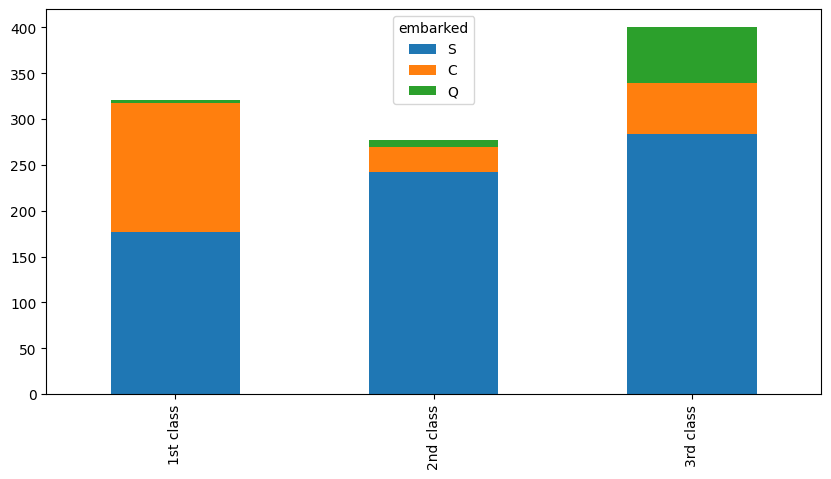

In [91]:
pclass1 = train_df[train_df['pclass']==1]['embarked'].value_counts()
# train_df에서 pclass가 1인 행만 골라냄. 
# 그 중 embarked(항구) 컬럼만 선택 후 그 값만 세어줌
pclass2 = train_df[train_df['pclass']==2]['embarked'].value_counts()
pclass3 = train_df[train_df['pclass']==3]['embarked'].value_counts()
df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))
# stacked: 그래프에서 여러 데이터를 하나의 막대(또는 선) 안에 겹쳐서 표현하는 방식

eambarked 형의 값 중 C, Q, S는 각 프랑스 셰르부르, 뉴질랜드 퀸즈 타운 영국의 사우샘프턴을 나타냄. 1등급 승객 중 퀸즈타운에서 승선한 승객은 거의 없음. 
embarked 정보가 누락되었다면 결측치 대신 s를 채워도 괜찮을 것

In [92]:
for dataset in data:
    dataset['embarked']=dataset['embarked'].fillna('S')

len(train_df['embarked'].isnull())
#위 코드는 True, False 시리즈를 반환함. 
#그래서 그냥 len을 쓰면 전체 길이(행 수)를 알려주지 결측치가 몇 개인지는 안 알려줌

#train_df['embarked'].isnull().sum()
#이렇게 수정해야 결측치가 몇 개인지 알려주고, 결과가 0이면 결측치가 다 채워졌다는 뜻

1000

결측치가 없는 것을 확인했으니 머신러닝 분류를 위해 숫자로 바꾸기
- 'S':0, 'C':1, 'Q':2

In [94]:
embarked_mapping={'S':0, 'C':1, 'Q':2}
for dataset in data:
    dataset['embarked']=dataset['embarked'].map(embarked_mapping)

train_df['embarked']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    2
Name: embarked, Length: 1000, dtype: int64

pclass 열에서 train_df['pclass'].dtype을 실행하면 dtype('int64')이 출력되어 정수형인 것을 확인 할 수 있음  => 전처리 할 필요 없음

### sibsp, parch열
- 혼자 여행하는 경우와 가족 여행의 경우 생존율에 어떤 차이가 있는지 살펴보기
- dataset['sibsp] + dataset['parch'] 두 열의 데이터를 더해 새로운 열인 sibpar 생성
- 값이 0보다 크면 혼자가 아님을 나타내는 n_alone열에 0을 넣고, 0이면 1을 넣음
- n_alone 열을 정수형으로 변경

In [96]:
data = [train_df, test_df]
for dataset in data:
    dataset['sibpar'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['sibpar'] > 0, 'n_alone'] = 0
    dataset.loc[dataset['sibpar'] == 0, 'n_alone'] = 1
    dataset['n_alone'] = dataset['n_alone'].astype(int)

test_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone
1000,3,1,0,0,0,0,367228,7.7500,NaN,2,1.0,0,1
1001,3,1,1,0,2,0,367226,23.2500,NaN,2,2.0,2,0
1002,3,1,1,0,2,0,367226,23.2500,NaN,2,2.0,2,0
1003,3,1,0,0,2,0,367226,23.2500,NaN,2,1.0,2,0
1004,3,1,1,0,0,0,330932,7.7875,NaN,2,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,0,1,0,2665,14.4542,NaN,1,2.0,1,0
1305,3,0,1,0,1,0,2665,14.4542,NaN,1,2.0,1,0
1306,3,0,0,0,0,0,2656,7.2250,NaN,1,1.0,0,1
1307,3,0,0,0,0,0,2670,7.2250,NaN,1,1.0,0,1


학습용 데이터와 테스트용 데이터에서 혼자 여행한 승객과 동반 여행한 승객 세어보기

In [98]:
train_df['n_alone'].value_counts()

n_alone
1    584
0    416
Name: count, dtype: int64

In [99]:
test_df['n_alone'].value_counts()

n_alone
1    206
0    103
Name: count, dtype: int64

### cabin 열
cabin 열의 값은 알파벳 + 숫자 또는 알파벳으로 이루어져있음

In [100]:
train_df.cabin.value_counts()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
C78                4
                  ..
E77                1
D38                1
F                  1
F E57              1
F E46              1
Name: count, Length: 180, dtype: int64

cabin 열 값의 맨 앞 영문자만 추출

In [102]:
for dataset in data:
    dataset['cabin'] = dataset['cabin'].str[:1]

train_df.cabin.value_counts()

cabin
C    94
B    65
D    46
E    38
A    22
F    17
T     1
Name: count, dtype: int64

승객 등급별로 어떤 객실 사용하는지 확인

<Axes: >

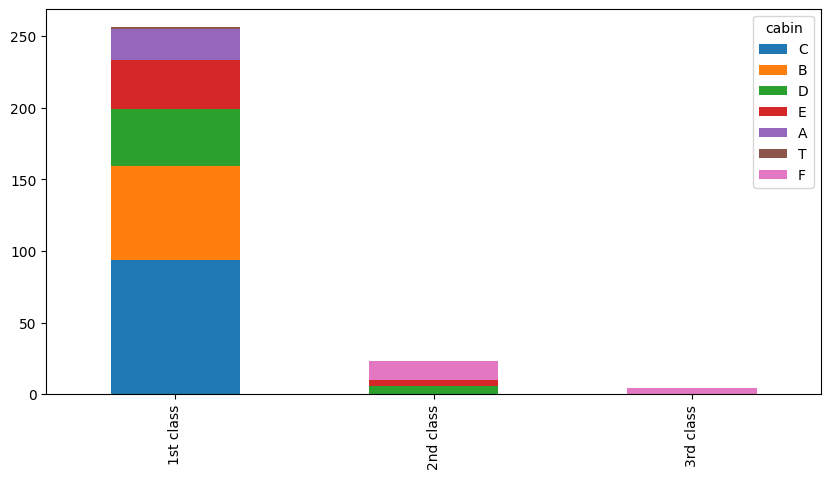

In [104]:
pclass1 = train_df[train_df['pclass'] == 1]['cabin'].value_counts()
# pclass가 1등석인 승객들의 cabin(객실) 값을 가져와서 각 갯수를 세어줌
pclass2 = train_df[train_df['pclass'] == 2]['cabin'].value_counts()
pclass3 = train_df[train_df['pclass'] == 3]['cabin'].value_counts()
df = pd.DataFrame([pclass1, pclass2, pclass3])
# 세개의 series(pclass 1,2,3)를 하나의 dataframe으로 묶음
# 행(row)은 각 pclass, 열(column)은 다양한 cabin 값
df.index = ['1st class', '2nd class', '3rd class']
# 행 인덱스 이름 바꾸기(원래 0,1,2)
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

- 1등급은 ABCDET, 2등급은 DEF, 3등급은 EFG로 구성
- 1000개의 데이터 중 283개만 값이 나오고 나머지는 결측치
- name, sex, embarked 열은 카테고리 변수로 데이터 분석에 사용할 계획
- 티켓 번호를 나타내는 ticket열의 값은 생존율과 관계가 없으니 분석에서 고려하지 않음

### fare 열
- 티켓 가격은 승객 등급과 관련이 높음
- fare 열에 결측치가 있으면 각 등급별 티켓 가격의 중앙값을 결측치 대신 넣음
- fare 열을 편의상 최댓값과 최솟값을 감안한 5개의 구간으로 나누기

In [107]:
train_df['fare'].fillna(train_df.groupby('pclass')['fare'].transform('median'), inplace = True)
test_df['fare'].fillna(test_df.groupby('pclass')['fare'].transform('median'), inplace = True)

for dataset in data:
    dataset.loc[dataset['fare'] <=20, 'fare'] = 1
    dataset.loc[(dataset['fare'] > 20) & (dataset['fare'] <= 30), 'fare'] = 2
    dataset.loc[(dataset['fare'] > 30) & (dataset['fare'] <= 50), 'fare'] = 3
    dataset.loc[(dataset['fare'] > 50) & (dataset['fare'] <= 100), 'fare'] = 4
    dataset.loc[dataset['fare'] > 100, 'fare'] = 5

train_df    

C:\Users\user\AppData\Local\Temp\ipykernel_4956\1556869391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['fare'].fillna(train_df.groupby('pclass')['fare'].transform('median'), inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_4956\1556869391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone
0,1,1,1,0,0,0,24160,5.0,B,0,2.0,0,1
1,1,1,0,0,1,2,113781,5.0,C,0,4.0,3,0
2,1,0,1,0,1,2,113781,5.0,C,0,2.0,3,0
3,1,0,0,0,1,2,113781,5.0,C,0,1.0,3,0
4,1,0,1,0,1,2,113781,5.0,C,0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,0,0,0,349213,1.0,NaN,1,1.0,0,1
996,3,0,0,0,0,0,349257,1.0,NaN,0,1.0,0,1
997,3,1,1,0,0,0,2649,1.0,NaN,1,0.0,0,1
998,3,0,0,0,0,0,349255,1.0,NaN,1,1.0,0,1


### 열 추가하기: 개인별 요금을 나타내는 fare_person
- 개인별 티켓 요금 계산: 동반자수 / 요금
- 새로 만든 fare_person 열에 정수 형태로 저장

In [110]:
for dataset1 in data:
    dataset1['fare_person'] = dataset1['fare'] / (dataset1['sibpar'] + 1)
    # +1은 본인 포함(sibpar은 동승한 가족 수)
    dataset1['faer_person'] = dataset1['fare_person'].astype(int)

train_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone,fare_person,faer_person
0,1,1,1,0,0,0,24160,5.0,B,0,2.0,0,1,5.00,5
1,1,1,0,0,1,2,113781,5.0,C,0,4.0,3,0,1.25,1
2,1,0,1,0,1,2,113781,5.0,C,0,2.0,3,0,1.25,1
3,1,0,0,0,1,2,113781,5.0,C,0,1.0,3,0,1.25,1
4,1,0,1,0,1,2,113781,5.0,C,0,0.0,3,0,1.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,0,0,0,349213,1.0,NaN,1,1.0,0,1,1.00,1
996,3,0,0,0,0,0,349257,1.0,NaN,0,1.0,0,1,1.00,1
997,3,1,1,0,0,0,2649,1.0,NaN,1,0.0,0,1,1.00,1
998,3,0,0,0,0,0,349255,1.0,NaN,1,1.0,0,1,1.00,1


### 최종 데이터
- 전처리가 끝났으니 분석에 사용할 데이터를 학습용 데이터와 테스트용 데이터로 만들기
- 학습용 데이터를 독립변수와 종속 변수의 2개 데이터프레임으로 나누기

In [114]:
x_columns = ['pclass', 'sex', 'age', 'embarked', 'title', 'sibpar', 'n_alone', 'fare_person']
y_columns = ['survived']
x_train = train_df[x_columns]
y_train = train_df[y_columns]
y_train
x_train

,pclass,sex,age,embarked,title,sibpar,n_alone,fare_person
0,1,1,0,0,2.0,0,1,5.00
1,1,0,0,0,4.0,3,0,1.25
2,1,1,0,0,2.0,3,0,1.25
3,1,0,0,0,1.0,3,0,1.25
4,1,1,0,0,0.0,3,0,1.25
...,...,...,...,...,...,...,...,...
995,3,0,0,1,1.0,0,1,1.00
996,3,0,0,0,1.0,0,1,1.00
997,3,1,0,1,0.0,0,1,1.00
998,3,0,0,1,1.0,0,1,1.00


테스트용 데이터

In [117]:
x_columns = ['pclass', 'sex', 'age', 'embarked', 'title', 'sibpar', 'n_alone', 'fare_person']
y_columns = ['survived']
x_test = test_df[x_columns]
y_test = test_df[y_columns]
x_test
y_test

,survived
1000,1
1001,1
1002,1
1003,1
1004,1
...,...
1304,0
1305,0
1306,0
1307,0
